# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis 

In [3]:


data = pd.read_csv('/Users/miguelopez/Desktop/Machine Learning/1-Supervised/1-Regression/3.Regularitation/Exercises/Advertising.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [4]:
len(data)

200

In [5]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
def scatter_plot(feature, target):
    plt.figure(figsize=(16, 8))
    plt.scatter(
        data[feature],
        data[target],
        c='black'
    )
    plt.xlabel("Money spent on {} ads ($)".format(feature))
    plt.ylabel("Sales")
    plt.show()

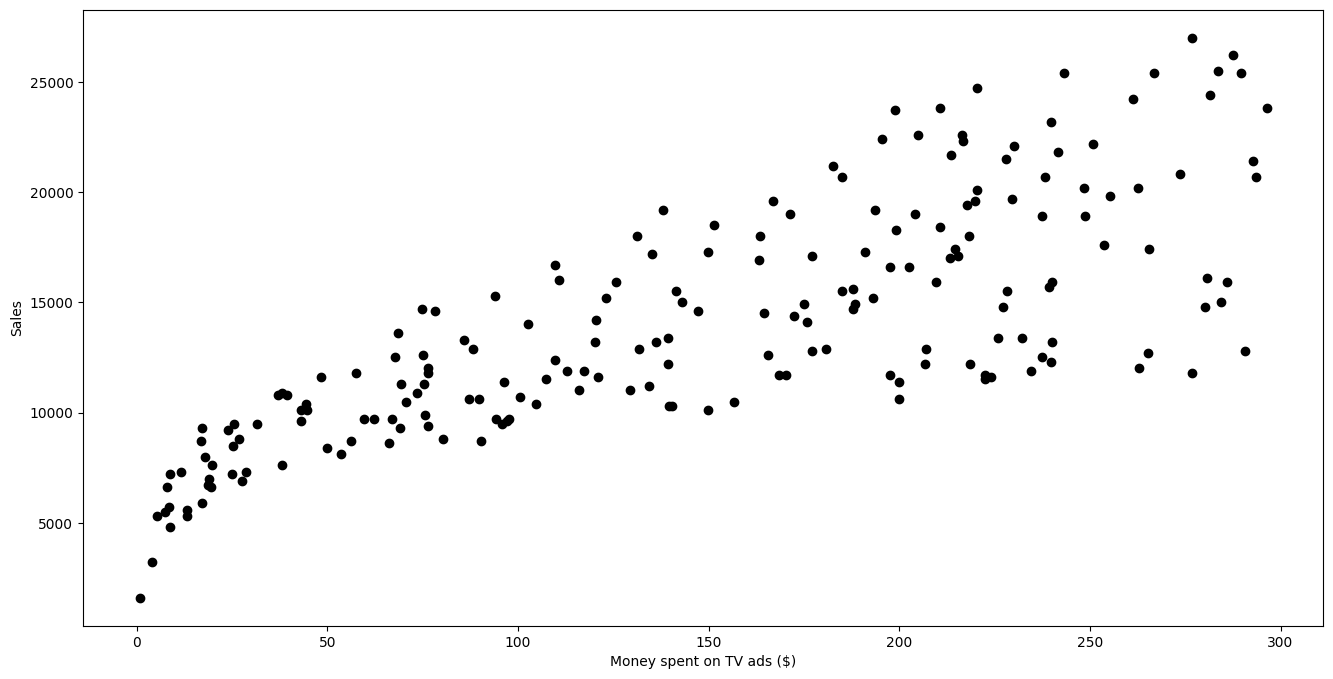

In [7]:
scatter_plot('TV', 'sales')

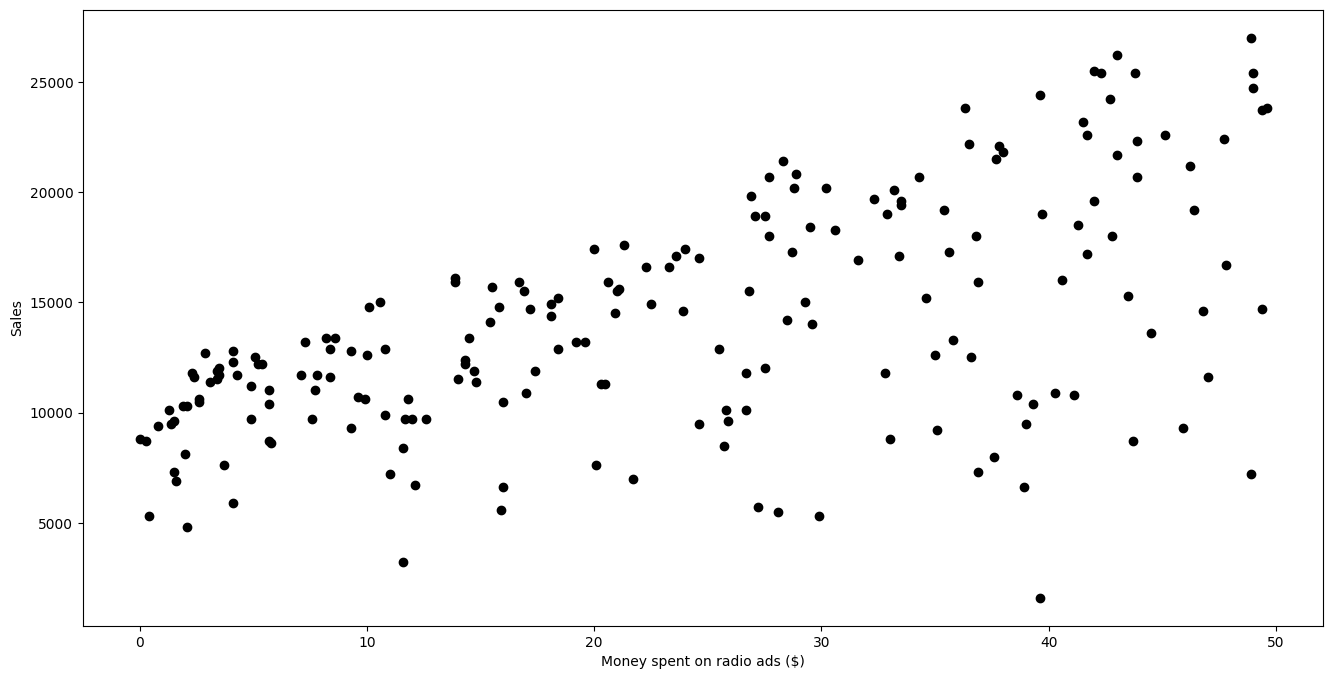

In [8]:
scatter_plot('radio', 'sales')

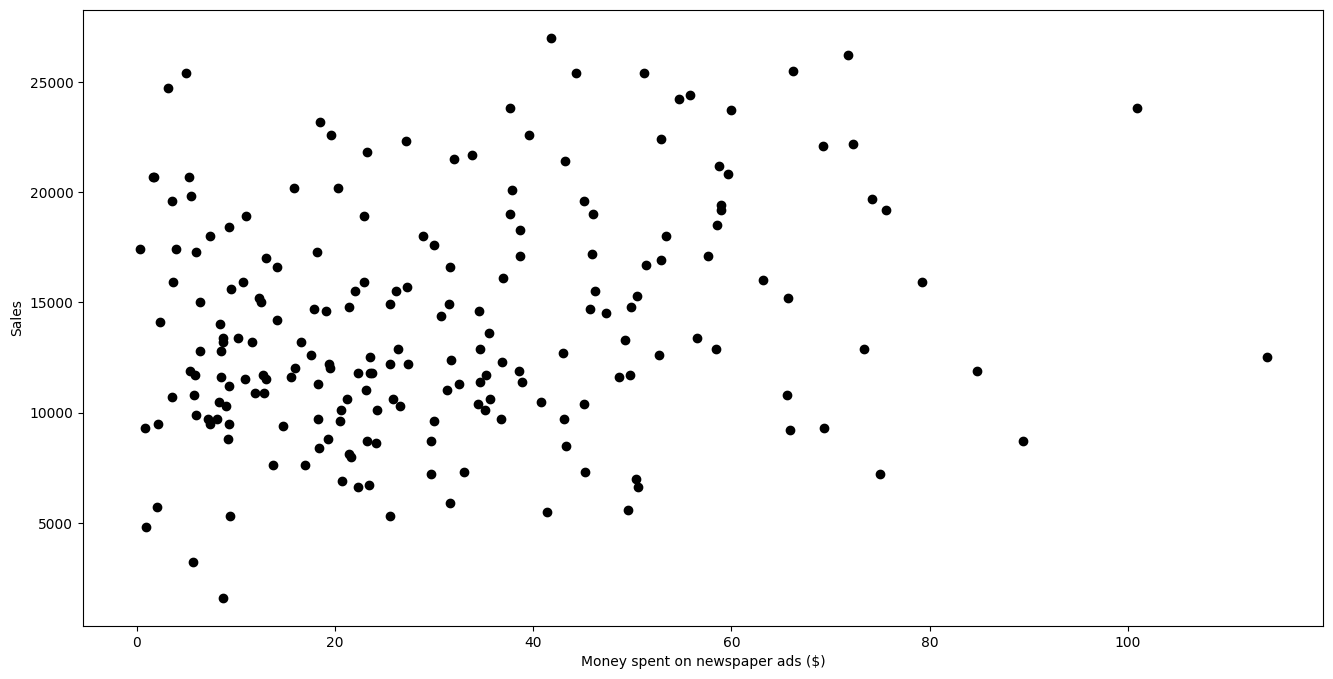

In [9]:
scatter_plot('newspaper', 'sales')

In [10]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot: >

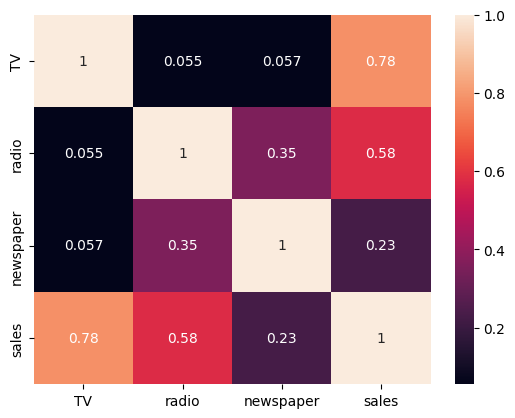

In [26]:
sns.heatmap(data.corr(), annot=True)  

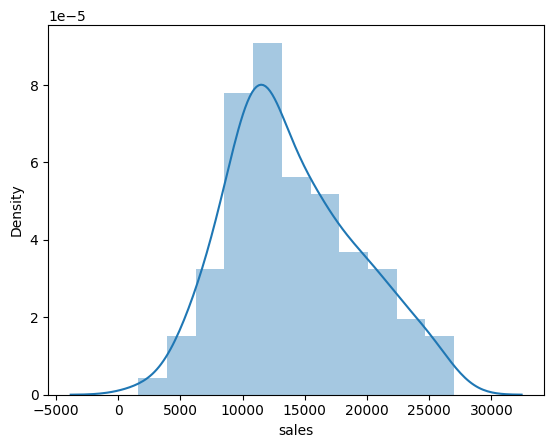

In [12]:
import seaborn as sns
sns.distplot(data['sales']);

## Modelling 

In [13]:
from sklearn.model_selection import train_test_split

#  feature X and target y
X= data.drop(columns=['sales'])
y= data['sales']    
# split X,y
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [14]:
# Scaler , mejor por separado  x y 
from sklearn.preprocessing import StandardScaler    
scale= StandardScaler()
scale_X_train = scale.fit_transform(X_train)
scale_X_test = scale.transform(X_test)

mae rmse r2 metrics to check if a model works well 
gridsearch pipeline y malla comprueba muchos modelos y los mejores para cada uno de los parametros. np.logspace(0, 1, 10)
xgboost al final hace una votacion de arboles stupidos y smartos, se puede hacer ensemble de modelos 
variables explican el resultado en el modelo el r cuadrado tiene que ser alto 
dispersion de errores para ver donde tiene mas problemas, en que rango 



In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# linear ression model

lin_reg = LinearRegression()
lin_reg.fit(scale_X_train, y_train)




LinearRegression()

In [16]:
# MAE / r^2

predict_X_test = lin_reg.predict(scale_X_test)

predict_y_train = lin_reg.predict(scale_X_train)

mae_train = mean_absolute_error(y_train, predict_y_train)
mae_test = mean_absolute_error(y_test, predict_X_test)

r2_train = r2_score(y_train, predict_y_train)
r2_test = r2_score(y_test, predict_X_test)


In [17]:
print("TRAIN:")
print(f"MAE train: {mae_train:.2f}")
print(f"R^2: {r2_train:.2f}")


print("TEST:")
print(f"MAE: {mae_test.round(2)}")
print(f"R^2: {r2_test.round(2)}")   




TRAIN:
MAE train: 1198.47
R^2: 0.90
TEST:
MAE: 1460.76
R^2: 0.9


### Ridge regression 

In [27]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

print("MSE: ", mean_squared_error(y_test, ridge.predict(X_test)))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

MSE:  3174072.7175495448
RMSE:  1781.592747389129


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)
'''
 Fits a ridge regression model on the training data X_train and y_train
 using the predefined parameters.
 
'''

ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [20]:
ridge_regressor.best_params_

{'alpha': 1e-15}

In [21]:
ridge_regressor.best_score_

-2943392.602590043

### Lasso 

In [22]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

print("MSE: ", mean_squared_error(y_test, lasso.predict(X_test)))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

MSE:  3174061.443031306
RMSE:  1781.5895832181177


In [23]:
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]} 
"""
Fits a Lasso regression model on the training data X_train and y_train using GridSearchCV
 to tune the 'alpha' hyperparameter. 

The 'parameters' dictionary defines different values for 'alpha' to try in the grid search.
 Scoring is done using 'neg_mean_squared_error' and 5-fold cross validation is used.

The fitted Lasso regression model with the best 'alpha' value is stored in 'lasso_regressor'.
"""


lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [24]:
lasso_regressor.best_params_ 

{'alpha': 20}

In [25]:
lasso_regressor.best_score_

-2942763.3458425347